# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [2]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

C:\Users\slai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 'U' mode is deprecated


In [3]:
# show the first review
yelp.iloc[0]

business_id                               9yKzy9PApeiPPOUJEtnvkg
date                                                  2011-01-26
review_id                                 fWKvX83p0-ka4JS3dc6E5A
stars                                                          5
text           My wife took me here on my birthday for breakf...
type                                                      review
user_id                                   rLtl8ZkDX5vH5nAx9C3q5Q
cool                                                           2
useful                                                         5
funny                                                          0
Name: 0, dtype: object

In [5]:
# convert the list of dictionaries to a DataFrame
type(yelp)
df = pd.DataFrame.from_dict(data)
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'useful': 1, 'cool': 0}"


In [24]:
# add DataFrame columns for cool, useful, and funny

pd.DataFrame.from_records(df.votes).head()
df_temp = pd.DataFrame.from_records(df.votes)
df = pd.concat([df, df_temp], axis=1)
df.head(3)



,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful,cool,funny,useful,cool,funny,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}",2,0,5,2,0,5,2,0,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'useful': 0, 'cool': 0}",0,0,0,0,0,0,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'useful': 1, 'cool': 0}",0,0,1,0,0,1,0,0,1


In [25]:
# drop the votes column and then display the head
df.drop('votes', axis=1).sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,funny,useful,cool,funny,useful,cool,funny,useful
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,0,2,0,0,2,0,0,2
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,0,1,0,0,1,0,0,1
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,0,1,0,0,1,0,0,1


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [26]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
df.groupby(['stars']).mean()

,cool,funny,useful,cool,funny,useful,cool,funny,useful
stars,,,,,,,,,
1,0.576769,1.056075,1.604806,0.576769,1.056075,1.604806,0.576769,1.056075,1.604806
2,0.719525,0.875944,1.563107,0.719525,0.875944,1.563107,0.719525,0.875944,1.563107
3,0.788501,0.694730,1.306639,0.788501,0.694730,1.306639,0.788501,0.694730,1.306639
4,0.954623,0.670448,1.395916,0.954623,0.670448,1.395916,0.954623,0.670448,1.395916
5,0.944261,0.608631,1.381780,0.944261,0.608631,1.381780,0.944261,0.608631,1.381780


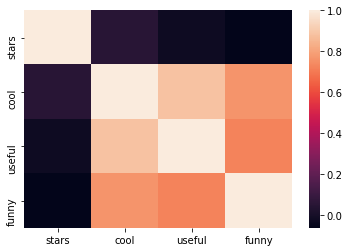

In [27]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())


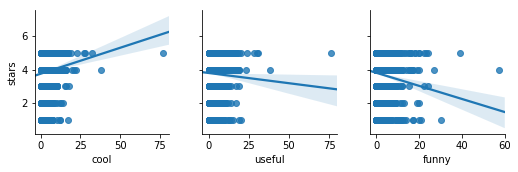

In [28]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
feature_cols = ['cool','useful','funny']
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [40]:
feature_cols = ['cool','useful','funny']
X = yelp[feature_cols]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)
linreg.intercept_, linreg.coef_

(3.839894792783082, array([ 0.27435947, -0.14745239, -0.13567449]))

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [42]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [43]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X, y)                  # fit the model using whole set
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

def train_test_rmse_curious(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)       # fit the model using training set
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [44]:
# calculate RMSE with all three features
train_test_split(X, y, random_state=123)
print('Whole set to fit the model:', train_test_rmse(['cool','useful','funny']))
print('Training set to fit the model:', train_test_rmse_curious(['cool','useful','funny']))

Whole set to fit the model: 1.17277465415
Training set to fit the model: 1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [48]:
print('Whole set to fit the model:', train_test_rmse(['cool','useful']))

Whole set to fit the model: 1.18535109713


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [ ]:
# new feature: 

In [ ]:
# new features: 


In [ ]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.